**Food Delivery Time Prediction using K-Nearest Neighbors (KNN)**
By,
Mehak Nafees 24k-7325
Maryam Shahab 23k-7324



The objective of this project is to predict the estimated delivery time of food orders using a machine learning approach. For this purpose, we selected the K-Nearest Neighbors (KNN) regression algorithm. KNN is a simple and intuitive model that predicts a target value by looking at similar past records. In our case, the model learns from previous food deliveries and estimates how long a new delivery might take based on how similar it is to those past deliveries.

We started the project by importing all the necessary Python libraries such as pandas and numpy for data handling, matplotlib and seaborn for data visualization, and various modules from scikit-learn for preprocessing, modeling, and evaluation. The dataset we used was provided in an Excel file named ‘Food_Delivery_Time_Dataset.xlsx’. This dataset included columns such as Restaurant_Location, Customer_Location, Distance_km, Rider_Age, Rider_Rating, Order_Time, Weather, Traffic_Conditions, and Delivery_Time_min which is the target variable we aimed to predict.

We began by importing the pandas library and used it to load our dataset. The dataset, stored in an Excel file named Food_Delivery_Time_Dataset.xlsx, contains records of food orders along with relevant features such as distance, rider rating, weather, and traffic conditions. The file was read using pd.read_excel() and stored in a DataFrame called df, which allowed us to work with the data in a tabular format.

In [2]:
import pandas as pd

import pandas as pd

df = pd.read_excel('/content/Food_Delivery_Time_Dataset.xlsx')

df = pd.read_excel('/content/Food_Delivery_Time_Dataset.xlsx')

Next, we imported all the required Python libraries that would be used throughout the project. These included numpy for numerical operations, matplotlib and seaborn for data visualization, and various modules from sklearn such as train_test_split, LabelEncoder, StandardScaler, KNeighborsRegressor, and evaluation metrics like mean_squared_error and r2_score. These libraries allowed us to preprocess our data, build the KNN model, and evaluate its performance.

In [3]:
# STEP 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


To make the notebook interactive and flexible, we allowed the user to upload the dataset manually through Google Colab. This block of code uses the files.upload() method to open a file browser. Once the file is uploaded, it is read into a DataFrame using pandas.read_excel(). The .head() function displays the first few rows, giving us an overview of the data structure.

In [4]:
# STEP 2: Upload the Dataset (Upload the Excel file)
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
df = pd.read_excel(next(iter(uploaded)))
df.head()


Saving Food_Delivery_Time_Dataset.xlsx to Food_Delivery_Time_Dataset (1).xlsx


,Order_ID,Restaurant_Location,Customer_Location,Distance_km,Rider_Age,Rider_Rating,Order_Time,Weather,Traffic_Conditions,Delivery_Time_min
0,FD1000,Malir,Korangi,3.55,34,5.0,21:33,Rainy,Heavy,15
1,FD1001,Malir,PECHS,2.31,35,5.0,19:56,Cloudy,Light,6
2,FD1002,Malir,PECHS,7.72,44,4.8,19:26,Sunny,Heavy,23
3,FD1003,Bahadurabad,Gulshan Block 3,12.01,36,3.8,22:56,Cloudy,Moderate,30
4,FD1004,North Nazimabad,Clifton,13.31,38,4.0,15:57,Cloudy,Light,28


We then defined the features and target variable. The feature matrix X was created by dropping Order_ID and Delivery_Time_min from the dataset, as Order_ID is just an identifier and Delivery_Time_min is our target. The target variable y was defined as the Delivery_Time_min column. We then identified the categorical columns in X (such as location and weather data) and applied one-hot encoding using pd.get_dummies(). This converted text data into binary numeric columns, which are required for machine learning models. After encoding, we split the dataset into training and testing sets using an 80-20 split and scaled the numerical data using StandardScaler. Scaling was important because KNN calculates distances, and features with larger ranges can dominate the results if not normalized.

In [10]:
# STEP 4: Define Features and Target

X = df.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y = df['Delivery_Time_min']

# Identify categorical columns - assuming 'Restaurant_Location' and 'City' are categorical
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first=True avoids multicollinearity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
# Now, X_train and X_test should only contain numerical columns (original numerical + one-hot encoded)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We proceeded to train the K-Nearest Neighbors regression model using the scaled training data. We initialized the model with n_neighbors=5, which means the prediction for each test point was based on the average delivery time of the 5 most similar training records. The model was trained using the .fit() method, and predictions for the test set were generated using .predict().

In [7]:
# STEP 5: Train KNN Model

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


To evaluate the model’s performance, we calculated three key metrics. The Mean Squared Error (MSE) measured the average of the squared differences between actual and predicted values. The Root Mean Squared Error (RMSE) provided an interpretable error in minutes. The R-squared (R²) score indicated how much of the variance in delivery time our model was able to explain. These metrics helped us judge how accurate and reliable our predictions were.

In [8]:
# STEP 6: Evaluate Model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 92.92
Root Mean Squared Error: 9.64
R-squared Score: 0.18


Finally, we created a Kernel Density Estimation (KDE) plot to visually compare the actual vs. predicted delivery times. Using seaborn.kdeplot, we plotted the distribution of the real values (y_test) and the predicted values (y_pred). This visual representation helped us understand how closely the model’s predictions followed the true delivery time distribution, offering a quick and intuitive way to check model accuracy.

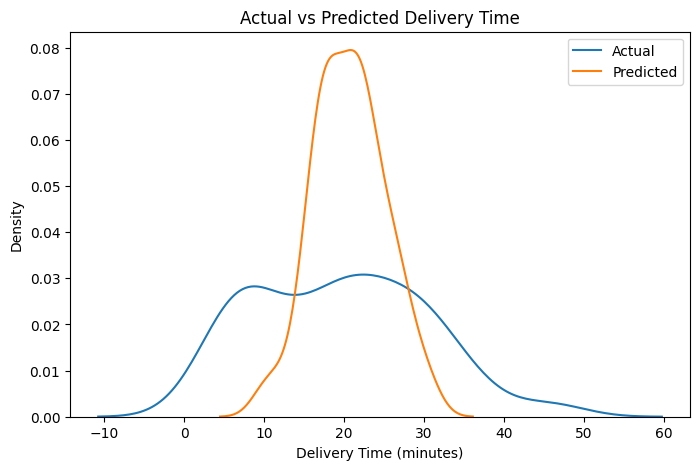

In [9]:
# STEP 7: Visualization (Actual vs Predicted)

plt.figure(figsize=(8,5))
sns.kdeplot(y_test, label='Actual')
sns.kdeplot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()
